# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Ваньков Ярослав Сергеевич и Вакуленко Инна Юрьевна. Бригада №4.


## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.


## Основные теоретические положения

### Дискретный нерекурсивный фильтр

Для заданного дискретного сигнала $x(n), n \in [0, N-1]$ последовательность, описывающая выходной сигнал нерекурсивного фильтра, в общем случае выглядит следующим образом:

$$y_n = \sum_{k=0}^{M} c_k x_{n-k}$$

где $M$ - размер окна, в котором производится сглаживание.

### Передаточная функция

Для дискретного сигнала $x_n$ передаточная функция нерекурсивного фильтра $y_n$ вычисляется следующим образом:

$$H(\omega) = \frac{y_n}{x_n}$$

Применяя к данному равенству формулу последовательности выходного сигнала дискретного нерекурсивного фильтра, получаем:

$$H(\omega) = \sum_{k=0}^{M} c_k x_{n-k}$$

В случае гармонического дискретного сигнала передаточная функция будет иметь следующий вид:

$$H(\omega) = \sum_{k=0}^{M} c_k e^{i\omega(n-k)} = \sum_{k=0}^{M} c_k e^{i\omega(n-k)} \cdot e^{-i\omega n}$$

### Связь передаточной функции для круговой и циклической частоты

$$H(\omega) = H(2\pi f) = \tilde{H}(f)$$



## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.



## Выполнение работы



In [1]:
# Импорт библиотек
import math
import matplotlib.pyplot as plt
from math import cos, log10

# Настройка графиков
plt.rcParams['figure.figsize'] = (12, 5)



### Сглаживание прямой линией (полином 1-й степени)

Выходной сигнал для фильтра сглаживания полиномом 1-й степени можно записать как: $y(t) = A + Bt$

**Рассмотрим приближение по трём точкам.**

Для нахождения коэффициентов полинома для наилучшего приближения воспользуемся формулой МНК:

$$\sum_{k=-1}^{1} (s_k - y_k)^2 = \sum_{k=-1}^{1} (s_k - A - Bk)^2 \to min$$

Взяв частные производные по $A$ и $B$, получим систему уравнений, из которой найдём $A$.

Итого получаем: $y_0 = \frac{1}{3}\sum_{k=-1}^{1} s_k$ или в общем случае: $y_n = \frac{1}{3}\sum_{k=n-1}^{n+1} s_k$

Взяв в качестве входного сигнала дискретный гармонический сигнал $e^{i\omega n}$, получим:

$$H(\omega) = \frac{1}{3}(1 + 2\cos(\omega))$$

Аналогично для 5, 7 и 9 точек:

- **5 точек:** $H(\omega) = \frac{1}{5}[1 + 2\cos(\omega) + 2\cos(2\omega)]$
- **7 точек:** $H(\omega) = \frac{1}{7}[1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega)]$
- **9 точек:** $H(\omega) = \frac{1}{9}[1 + 2\cos(\omega) + 2\cos(2\omega) + 2\cos(3\omega) + 2\cos(4\omega)]$



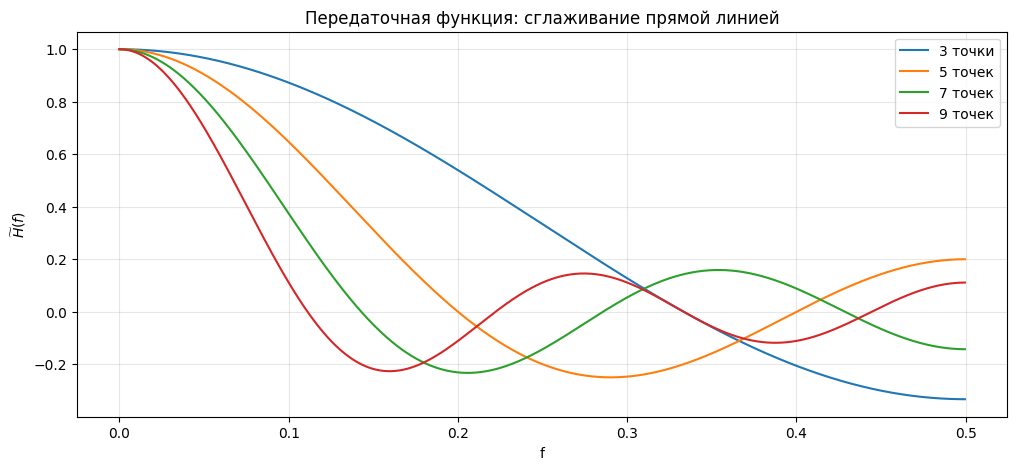

In [2]:
# Передаточные функции для сглаживания прямой линией

def H_1_3(w):
    return (1 + 2*cos(w)) / 3

def H_1_5(w):
    return (1 + 2*cos(w) + 2*cos(2*w)) / 5

def H_1_7(w):
    return (1 + 2*cos(w) + 2*cos(2*w) + 2*cos(3*w)) / 7

def H_1_9(w):
    return (1 + 2*cos(w) + 2*cos(2*w) + 2*cos(3*w) + 2*cos(4*w)) / 9

# Количество частот гармоник
N = 2048
# Циклические частоты
F = [f/N for f in range(N)][:N//2]
# Круговые частоты
W = [2*math.pi * f for f in F]

# Вычисляем значения
h_1_3 = [H_1_3(w) for w in W]
h_1_5 = [H_1_5(w) for w in W]
h_1_7 = [H_1_7(w) for w in W]
h_1_9 = [H_1_9(w) for w in W]

# График
plt.plot(F, h_1_3, label='3 точки')
plt.plot(F, h_1_5, label='5 точек')
plt.plot(F, h_1_7, label='7 точек')
plt.plot(F, h_1_9, label='9 точек')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$')
plt.title('Передаточная функция: сглаживание прямой линией')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



Как видно из графиков передаточных функций, при увеличении количества точек передаточная функция становится более крутой, то есть быстрее переходит в полосу подавления.



### Сглаживание полиномом 2-й степени

$y(t) = A + Bt + Ct^2$

**Рассмотрим случай для 13 точек.** Решая систему уравнений МНК, получаем:

$$H(\omega) = \frac{1}{143}(25 + 48\cos(\omega) + 42\cos(2\omega) + 32\cos(3\omega) + 18\cos(4\omega) - 22\cos(6\omega))$$

Аналогично для 7, 9, 11 точек:

- **7 точек:** $H(\omega) = \frac{1}{21}(7 + 12\cos(\omega) + 6\cos(2\omega) - 4\cos(3\omega))$
- **9 точек:** $H(\omega) = \frac{1}{231}(59 + 108\cos(\omega) + 78\cos(2\omega) + 28\cos(3\omega) - 42\cos(4\omega))$
- **11 точек:** $H(\omega) = \frac{1}{429}(89 + 168\cos(\omega) + 138\cos(2\omega) + 88\cos(3\omega) + 18\cos(4\omega) - 72\cos(5\omega))$



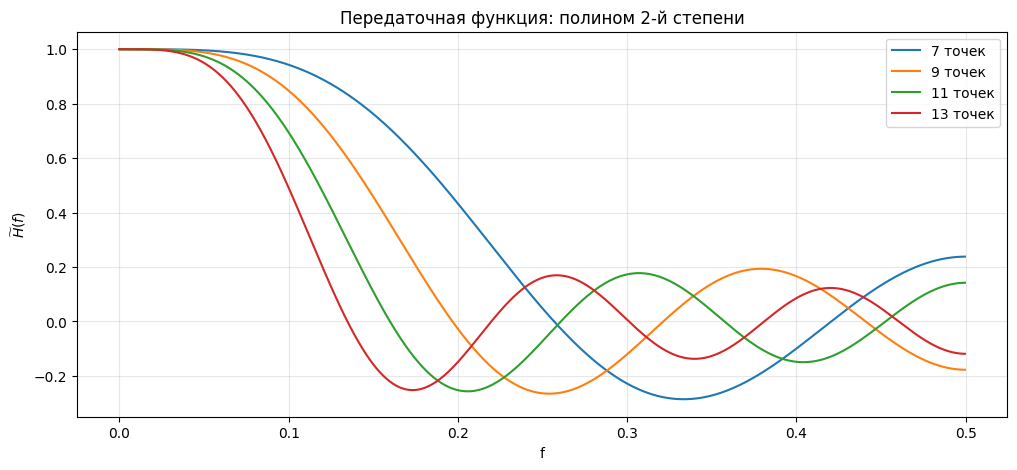

In [3]:
# Передаточные функции для полинома 2-й степени

def H_2_7(w):
    return (7 + 12*cos(w) + 6*cos(2*w) - 4*cos(3*w)) / 21

def H_2_9(w):
    return (59 + 108*cos(w) + 78*cos(2*w) + 28*cos(3*w) - 42*cos(4*w)) / 231

def H_2_11(w):
    return (89 + 168*cos(w) + 138*cos(2*w) + 88*cos(3*w) + 18*cos(4*w) - 72*cos(5*w)) / 429

def H_2_13(w):
    return (25 + 48*cos(w) + 42*cos(2*w) + 32*cos(3*w) + 18*cos(4*w) - 22*cos(6*w)) / 143

# График
h_2_7 = [H_2_7(w) for w in W]
h_2_9 = [H_2_9(w) for w in W]
h_2_11 = [H_2_11(w) for w in W]
h_2_13 = [H_2_13(w) for w in W]

plt.plot(F, h_2_7, label='7 точек')
plt.plot(F, h_2_9, label='9 точек')
plt.plot(F, h_2_11, label='11 точек')
plt.plot(F, h_2_13, label='13 точек')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$')
plt.title('Передаточная функция: полином 2-й степени')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



Из данных графиков можно заметить, что, как и в случае с приближением прямой линией, передаточные функции становятся более крутыми при увеличении количества точек.



### Сглаживание полиномом 4-й степени

$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$

Решая систему уравнений МНК для 9, 11, 13 и 15 точек:

- **9 точек:** $H(\omega) = \frac{1}{429}(179 + 270\cos(\omega) + 60\cos(2\omega) - 110\cos(3\omega) + 30\cos(4\omega))$
- **11 точек:** $H(\omega) = \frac{1}{429}(143 + 240\cos(\omega) + 120\cos(2\omega) - 20\cos(3\omega) - 90\cos(4\omega) + 36\cos(5\omega))$
- **13 точек:** $H(\omega) = \frac{1}{2431}(677 + 1200\cos(\omega) + 780\cos(2\omega) + 220\cos(3\omega) - 270\cos(4\omega) - 396\cos(5\omega) + 220\cos(6\omega))$
- **15 точек:** $H(\omega) = \frac{1}{46189}(11063 + 20250\cos(\omega) + 15000\cos(2\omega) + 7510\cos(3\omega) - 330\cos(4\omega) - 5874\cos(5\omega) - 5720\cos(6\omega) + 4290\cos(7\omega))$



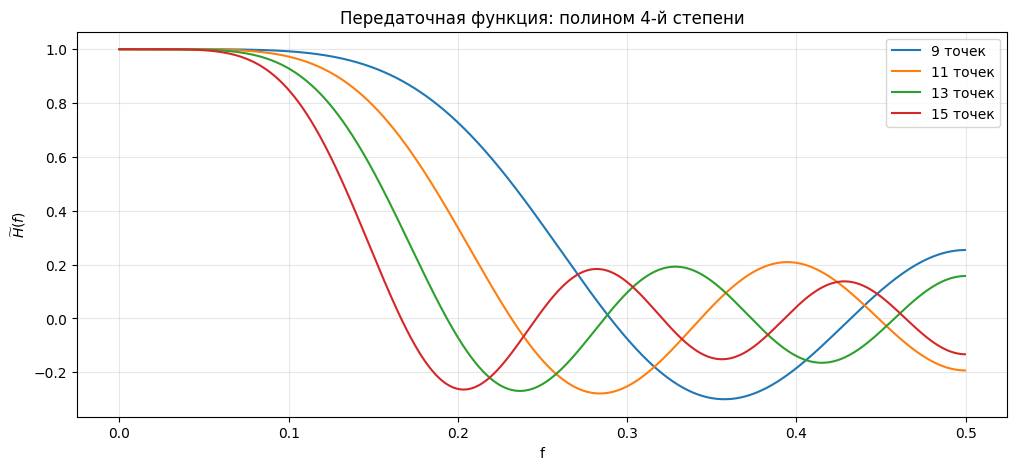

In [4]:
# Передаточные функции для полинома 4-й степени

def H_4_9(w):
    return (179 + 270*cos(w) + 60*cos(2*w) - 110*cos(3*w) + 30*cos(4*w)) / 429

def H_4_11(w):
    return (143 + 240*cos(w) + 120*cos(2*w) - 20*cos(3*w) - 90*cos(4*w) + 36*cos(5*w)) / 429

def H_4_13(w):
    return (677 + 1200*cos(w) + 780*cos(2*w) + 220*cos(3*w) - 270*cos(4*w) - 396*cos(5*w) + 220*cos(6*w)) / 2431

def H_4_15(w):
    return (11063 + 20250*cos(w) + 15000*cos(2*w) + 7510*cos(3*w) - 330*cos(4*w) - 5874*cos(5*w) - 5720*cos(6*w) + 4290*cos(7*w)) / 46189

# График
h_4_9 = [H_4_9(w) for w in W]
h_4_11 = [H_4_11(w) for w in W]
h_4_13 = [H_4_13(w) for w in W]
h_4_15 = [H_4_15(w) for w in W]

plt.plot(F, h_4_9, label='9 точек')
plt.plot(F, h_4_11, label='11 точек')
plt.plot(F, h_4_13, label='13 точек')
plt.plot(F, h_4_15, label='15 точек')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$')
plt.title('Передаточная функция: полином 4-й степени')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



Аналогично для передаточных функций фильтра приближением полиномом 4-й степени можно заметить, что при увеличении количества точек функции значительно быстрее приближаются к полосе подавления и начинают колебаться.



### Сглаживание по формулам Спенсера

Для сглаживания по формулам Спенсера доступны следующие формулы:

- **15 точек:** $H(\omega) = \frac{1}{320}(74 + 134\cos(\omega) + 92\cos(2\omega) + 42\cos(3\omega) + 6\cos(4\omega) - 10\cos(5\omega) - 12\cos(6\omega) - 6\cos(7\omega))$
- **21 точка:** $H(\omega) = \frac{1}{350}(60 + 114\cos(\omega) + 94\cos(2\omega) + 66\cos(3\omega) + 36\cos(4\omega) + 12\cos(5\omega) - 4\cos(6\omega) - 10\cos(7\omega) - 10\cos(8\omega) - 6\cos(9\omega) - 2\cos(10\omega))$



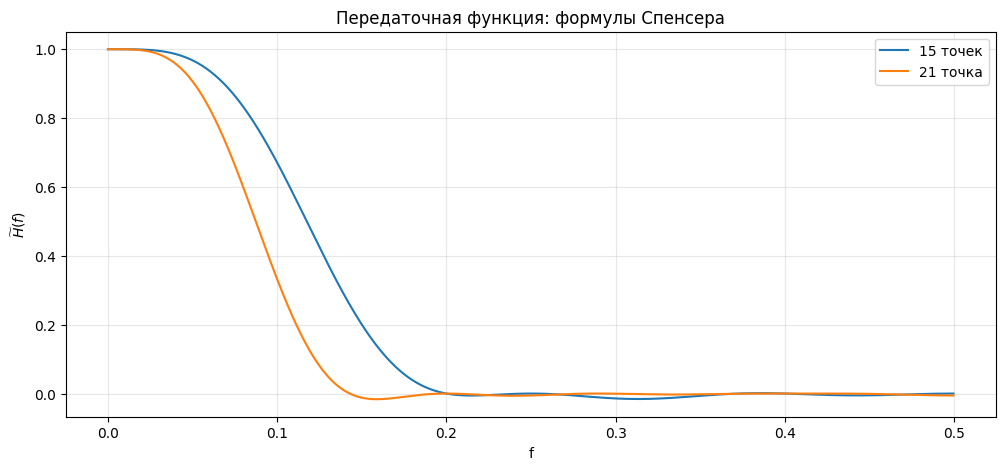

In [5]:
# Формулы Спенсера

def H_S_15(w):
    return (74 + 134*cos(w) + 92*cos(2*w) + 42*cos(3*w) + 6*cos(4*w) - 10*cos(5*w) - 12*cos(6*w) - 6*cos(7*w)) / 320

def H_S_21(w):
    return (60 + 114*cos(w) + 94*cos(2*w) + 66*cos(3*w) + 36*cos(4*w) + 12*cos(5*w) - 4*cos(6*w) - 10*cos(7*w) - 10*cos(8*w) - 6*cos(9*w) - 2*cos(10*w)) / 350

# График
h_S_15 = [H_S_15(w) for w in W]
h_S_21 = [H_S_21(w) for w in W]

plt.plot(F, h_S_15, label='15 точек')
plt.plot(F, h_S_21, label='21 точка')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$')
plt.title('Передаточная функция: формулы Спенсера')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



Для приближения по формулам Спенсера также явно видно, что передаточная функция значительно быстрее спускается в полосу подавления при увеличении количества точек приближения.



### Графики в логарифмической шкале (дБ)

Значение в дБ вычисляется как: $20 \cdot \log_{10}|H(\omega)|$

Логарифмическая шкала позволяет равномерно распределить большие значения на графике, чтобы облегчить их сравнение. Благодаря этим свойствам на графиках в логарифмической шкале можно заметить более слабые изменения передаточных функций, которые почти незаметны на обычных графиках.



In [6]:
# Логарифмические функции

def Log_H_1_3(w): return 20 * log10(abs(H_1_3(w)))
def Log_H_1_5(w): return 20 * log10(abs(H_1_5(w)))
def Log_H_1_7(w): return 20 * log10(abs(H_1_7(w)))
def Log_H_1_9(w): return 20 * log10(abs(H_1_9(w)))

def Log_H_2_7(w): return 20 * log10(abs(H_2_7(w)))
def Log_H_2_9(w): return 20 * log10(abs(H_2_9(w)))
def Log_H_2_11(w): return 20 * log10(abs(H_2_11(w)))
def Log_H_2_13(w): return 20 * log10(abs(H_2_13(w)))

def Log_H_4_9(w): return 20 * log10(abs(H_4_9(w)))
def Log_H_4_11(w): return 20 * log10(abs(H_4_11(w)))
def Log_H_4_13(w): return 20 * log10(abs(H_4_13(w)))
def Log_H_4_15(w): return 20 * log10(abs(H_4_15(w)))

def Log_H_S_15(w): return 20 * log10(abs(H_S_15(w)))
def Log_H_S_21(w): return 20 * log10(abs(H_S_21(w)))



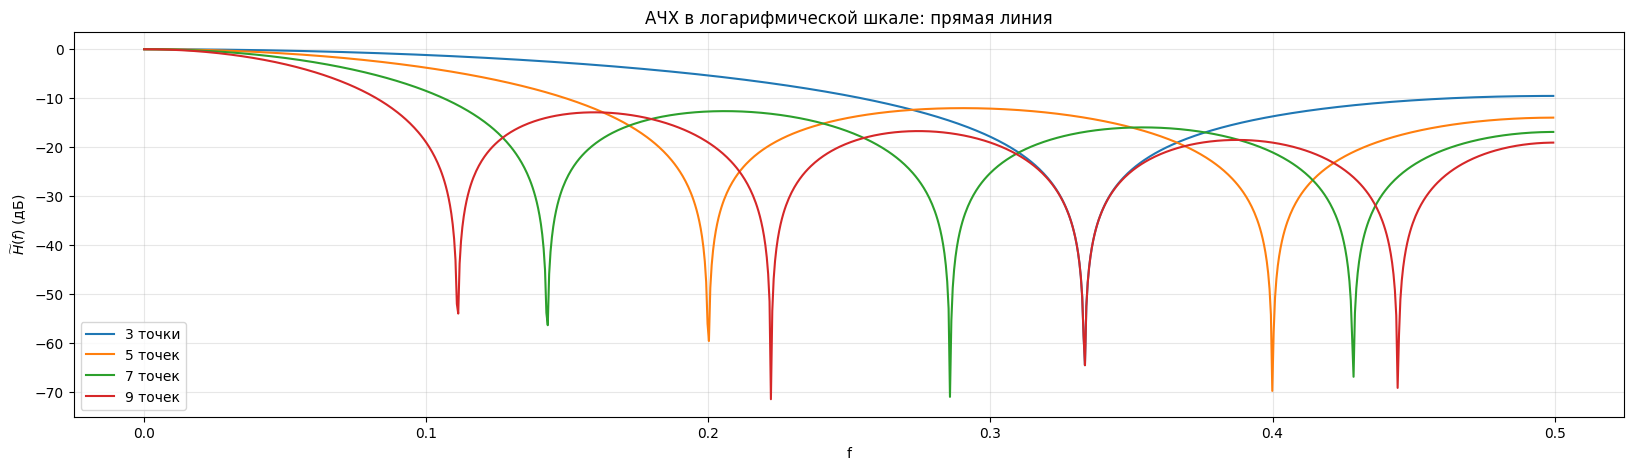

In [7]:
# График 1: Прямая линия (дБ)
plt.figure(figsize=(20, 5))

log_h_1_3 = [Log_H_1_3(w) for w in W]
log_h_1_5 = [Log_H_1_5(w) for w in W]
log_h_1_7 = [Log_H_1_7(w) for w in W]
log_h_1_9 = [Log_H_1_9(w) for w in W]

plt.plot(F, log_h_1_3, label='3 точки')
plt.plot(F, log_h_1_5, label='5 точек')
plt.plot(F, log_h_1_7, label='7 точек')
plt.plot(F, log_h_1_9, label='9 точек')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$ (дБ)')
plt.title('АЧХ в логарифмической шкале: прямая линия')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



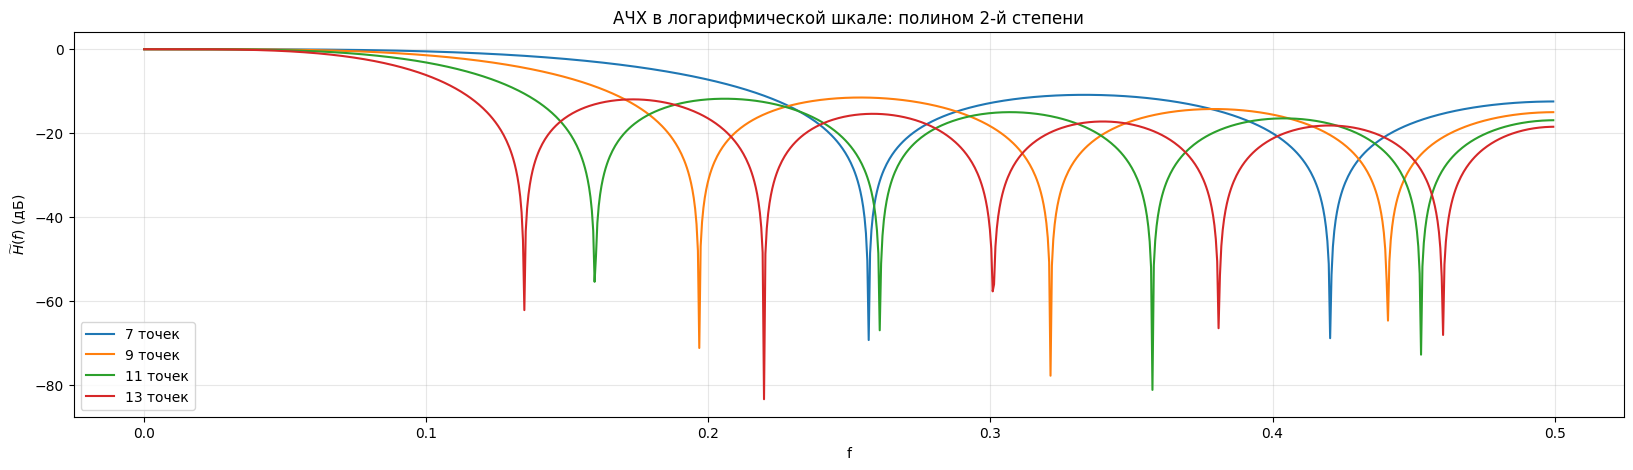

In [8]:
# График 2: Полином 2-й степени (дБ)
plt.figure(figsize=(20, 5))

log_h_2_7 = [Log_H_2_7(w) for w in W]
log_h_2_9 = [Log_H_2_9(w) for w in W]
log_h_2_11 = [Log_H_2_11(w) for w in W]
log_h_2_13 = [Log_H_2_13(w) for w in W]

plt.plot(F, log_h_2_7, label='7 точек')
plt.plot(F, log_h_2_9, label='9 точек')
plt.plot(F, log_h_2_11, label='11 точек')
plt.plot(F, log_h_2_13, label='13 точек')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$ (дБ)')
plt.title('АЧХ в логарифмической шкале: полином 2-й степени')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



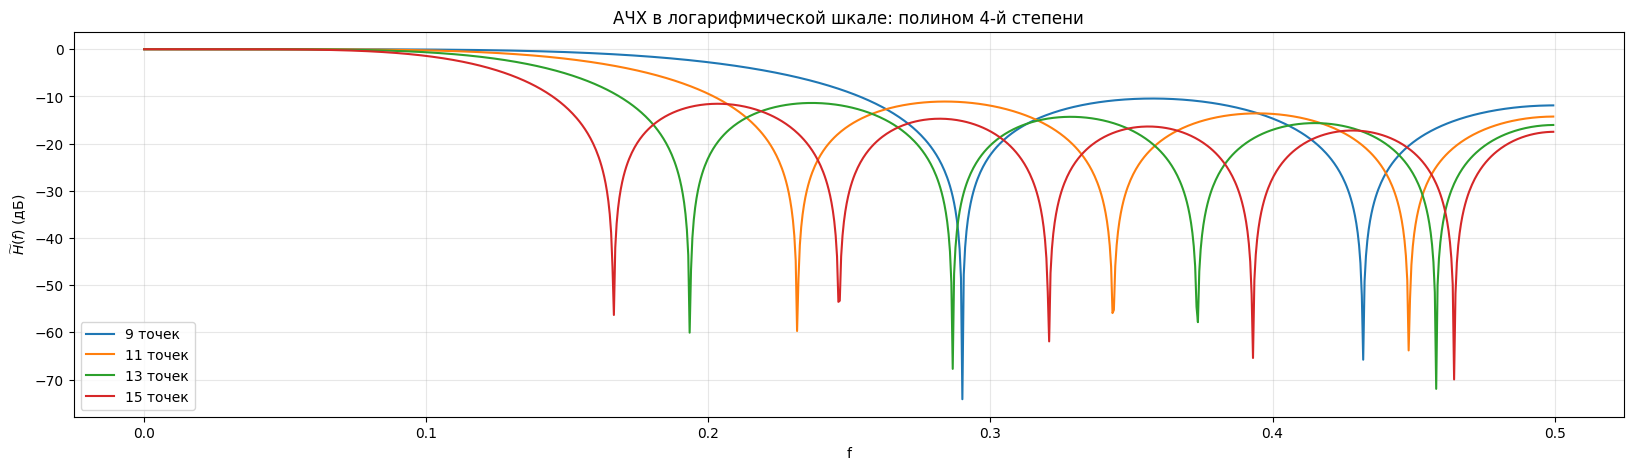

In [9]:
# График 3: Полином 4-й степени (дБ)
plt.figure(figsize=(20, 5))

log_h_4_9 = [Log_H_4_9(w) for w in W]
log_h_4_11 = [Log_H_4_11(w) for w in W]
log_h_4_13 = [Log_H_4_13(w) for w in W]
log_h_4_15 = [Log_H_4_15(w) for w in W]

plt.plot(F, log_h_4_9, label='9 точек')
plt.plot(F, log_h_4_11, label='11 точек')
plt.plot(F, log_h_4_13, label='13 точек')
plt.plot(F, log_h_4_15, label='15 точек')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$ (дБ)')
plt.title('АЧХ в логарифмической шкале: полином 4-й степени')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



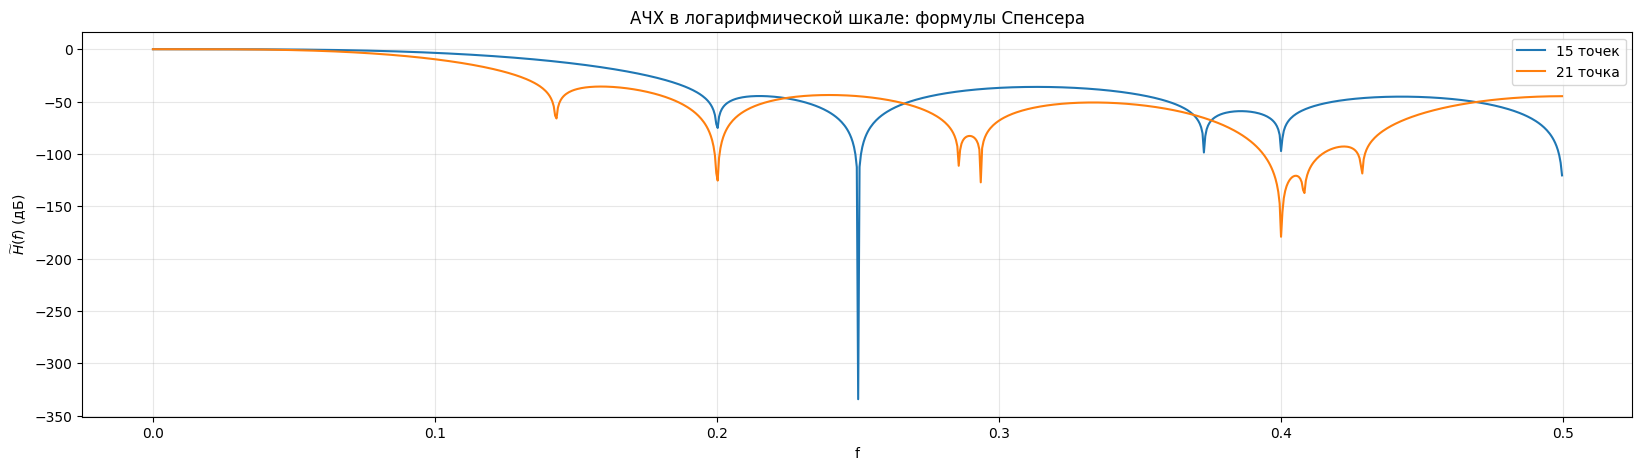

In [10]:
# График 4: Формулы Спенсера (дБ)
plt.figure(figsize=(20, 5))

log_h_S_15 = [Log_H_S_15(w) for w in W]
log_h_S_21 = [Log_H_S_21(w) for w in W]

plt.plot(F, log_h_S_15, label='15 точек')
plt.plot(F, log_h_S_21, label='21 точка')
plt.xlabel('f')
plt.ylabel('$\\widetilde{H}(f)$ (дБ)')
plt.title('АЧХ в логарифмической шкале: формулы Спенсера')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### Сопоставительный анализ свойств передаточных функций

По представленным графикам передаточных функций нерекурсивных фильтров, соответствующим фильтрам сглаживания полиномами 1, 2, 4 степени и сглаживанию по формуле Спенсера, можно сделать вывод, что для всех исследованных передаточных функций характерен более быстрый спуск и дальнейшее уменьшение амплитуды колебаний, но увеличение частоты при увеличении количества точек приближения.



## Выводы

В ходе выполнения лаборатрной работы были получены формулы для передаточных функций нерекурсивных фильтров, соответствующих сглаживанию полиномами 1, 2, 4 степеней и сглаживанию по формуле Спенсера для разного количества точек приближения.

По полученным формулам были построены и проанализированы графики передаточной функции $\tilde{H}(\omega)$. Данные графики также были построены в логарифмической шкале, что позволило более точно рассмотреть малейшие колебания передаточных функций.

Также был проведён сопоставительный анализ передаточных функций исследуемых фильтров.

**Основные результаты:**

1. При увеличении количества точек сглаживания передаточная функция становится более крутой и быстрее переходит в полосу подавления
2. Фильтры высших степеней (полином 4-й степени) лучше сохраняют детали сигнала, но имеют более широкую полосу пропускания
3. Формулы Спенсера обеспечивают хороший компромисс между сглаживанием и сохранением деталей
4. Логарифмическая шкала позволяет увидеть характеристики фильтров в области подавления, которые незаметны в линейной шкале

**Цель работы достигнута:** проведен частотный анализ полиномиальных приближений.

